# Hiyerarşik Kümeleme
* Amaç gözlemleri birbirlerne olan benzerliklerine göre alt kümelere ayırmaktır.
---
* kemanstan farkı :; Gözlemler daha fazla sayıda alt kümeye ayrılmak isteniyorsa bu durumda hiyerarşik kümeleme yöntemleri kullanılabilir.
----
* K-Means yönteminde sadece belirli bir sayıda kümeleme yapabiliyoruz.
* Hiyerarşik kümeleme de ise hem belirli bir sayıda kümeye ayırabiliriz hem de oluşan yeni kümelerin altında da yeni kümelere ayırabiliriz.
-----
1. Divisive (Bölümleyici):birleştiricinin tesi
* Başlangıçta 1 tane küme var
* Tüm gözlemlerin bir arada olduğu küme iki alt kümeye ayrılır.
* Oluşan yeni kümeler birbirlerine benzemeyen alt kümelere bölünür.
* Aynı işlem gözlem sayısı kadar küme elde edilinceye kadar tekrar edilir.
-----------
2. Agglomerative (birleştirici): 
* Başlangıçta gözlem sayısı kadar küme vardır.
- Veri setinde birbirine en yakın olan iki gözlem bulunur.
* Bu iki nokta bir araya getirilerek yeni bir gözlem oluşturulur. yani artık veri seti ilk birleşimdeki gözlemlerden oluşmaktadır.
* Aynı işlem tekrarlanarak yukarı doğru çıkılır. Yani iki kümenin birleşiminden oluşan bu yeni kümeler aynı şekilde birbirlerne benzerliklerine göre tekrar birleştirilir. Bu işlem tüm gözlemler tek bir kümede toplanana kadar bu işlemler tekrar edilir.
* Birbirine yakın noktalar uzaklık ölçüleri kullanarak belirlenir. Öklit uzaklığı, manhattan uzaklığı, korelasyın vs.
-------
#### Kümeleme Yöntemleri ile Karar Ağaçlarının Karşılaştırılması
* Hiyerarşik yöntemelerde küme sayısına dendrogram sonuçlarına bakılarak karar verilirken, hiyerarşik olmayan yöntemlerde küme sayısı uygulama yapılmadan önce belirlenir
* Hiyerarşik kümeleme yöntemlerinde veri seti gözlemlerin ya da değişkenlerin bazında kümeleme işlemine sokulabilirken hiyerarşik olmayan yöntemlerde sadece gözlemlerin kümelenmesi mümkündür.
* Karar ağaçlarından farkı ; karar ağaçlarında ayırma işlemi hedef değişkene göre yapılırken burada bağımlı değişken olmadığı için gözlemler bağımsız değişkenler üzerinden yapılan uzaklık hesaplarına göre kümelere ayrılır.
----


hiyerarşik küme ugulama

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage

In [5]:
df = pd.read_csv('USArrests.csv', index_col= 0)

In [9]:
hc_complete =linkage(df,'complete')
hc_average= linkage(df,'average')

In [10]:
?linkage

Signature: linkage(y, method='single', metric='euclidean', optimal_ordering=False)
Docstring:
Perform hierarchical/agglomerative clustering.

The input y may be either a 1-D condensed distance matrix
or a 2-D array of observation vectors.

If y is a 1-D condensed distance matrix,
then y must be a :math:`\binom{n}{2}` sized
vector, where n is the number of original observations paired
in the distance matrix. The behavior of this function is very
similar to the MATLAB linkage function.

A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
:math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
cluster with an index less than :math:`n` corresponds to one of
the :math:`n` original observations. The distance between
clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
fourth value ``Z[i, 3]`` represents the number of original
observations in the newly formed cluster.

The following linkage methods are used to comp

In [11]:
from scipy.cluster.hierarchy import dendrogram

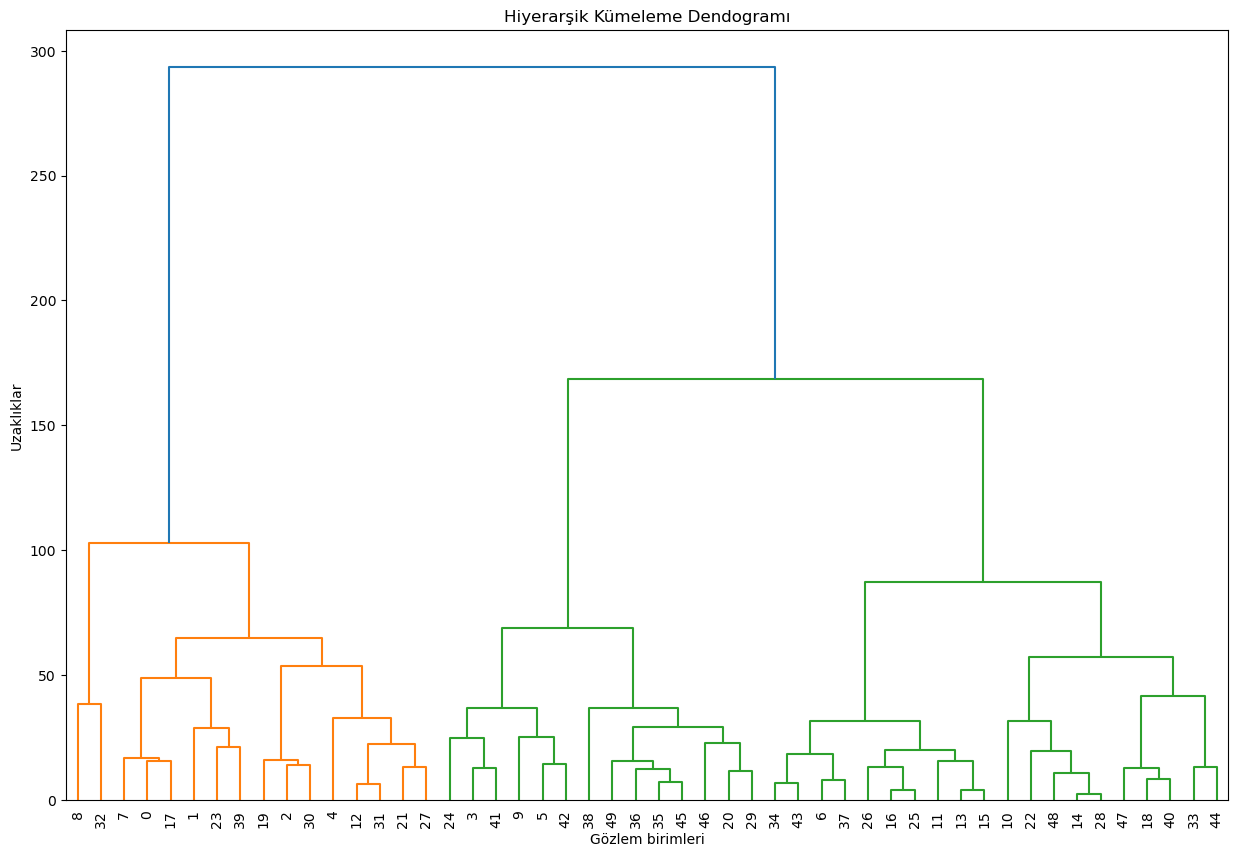

In [13]:
plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme Dendogramı')
plt.xlabel('Gözlem birimleri')
plt.ylabel('Uzaklıklar')
dendrogram(hc_complete,leaf_font_size=10);

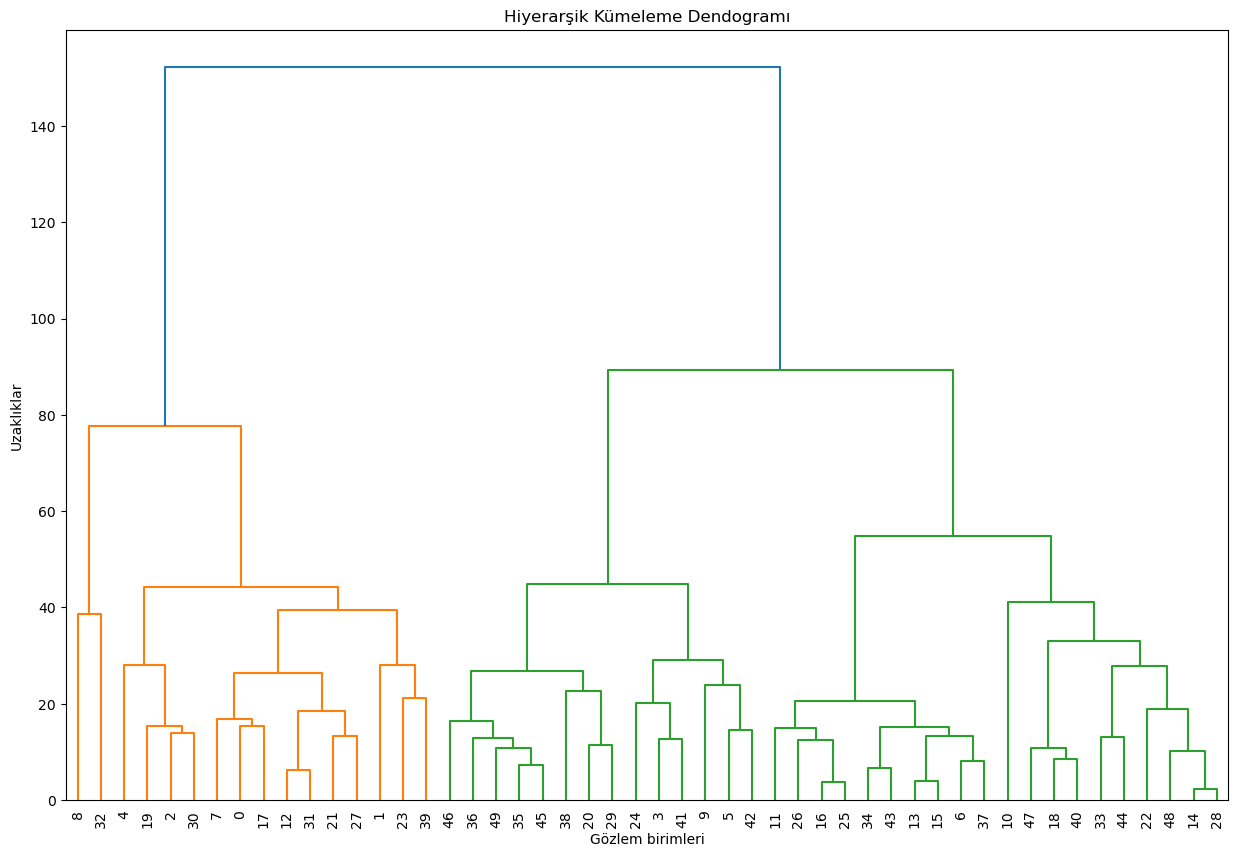

In [17]:
plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme Dendogramı')
plt.xlabel('Gözlem birimleri')
plt.ylabel('Uzaklıklar')
dendrogram(hc_average,
           leaf_font_size=10);

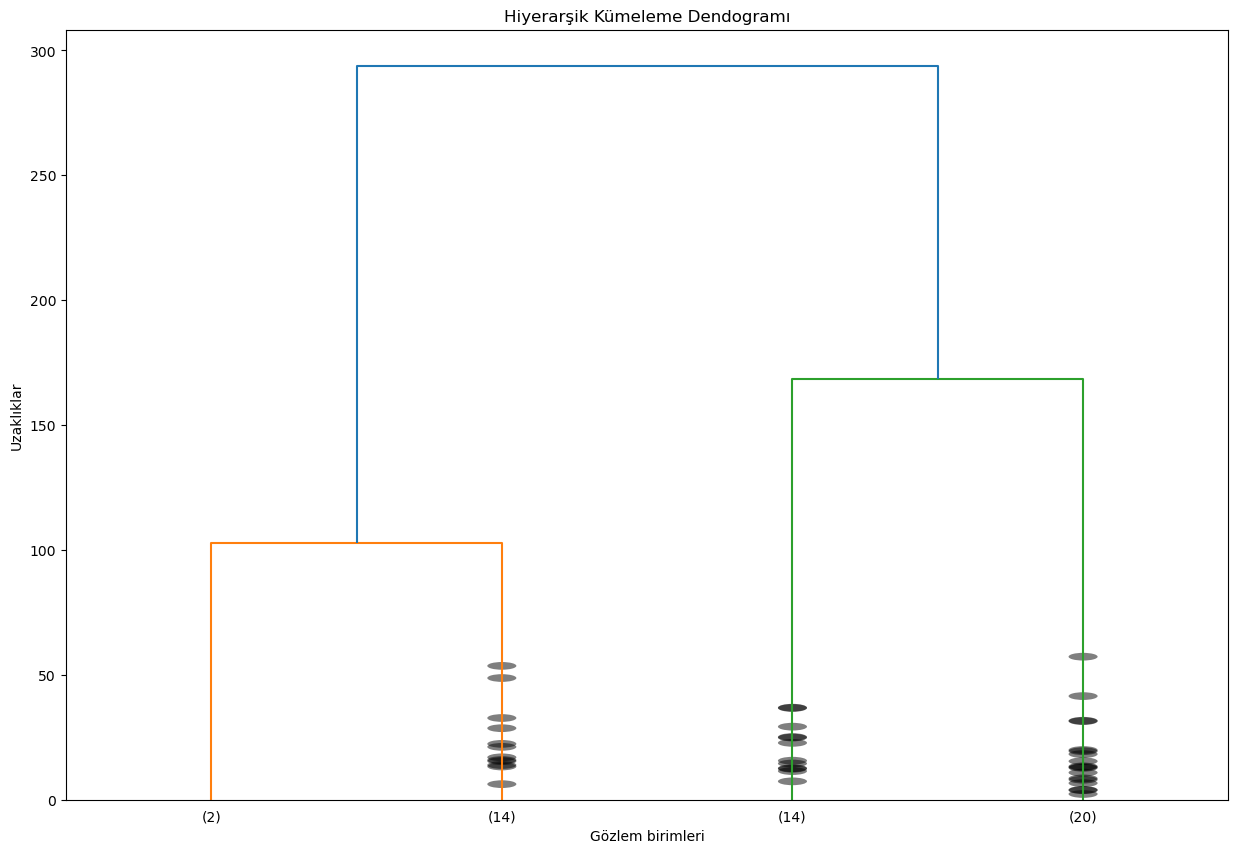

In [20]:
plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme Dendogramı')
plt.xlabel('Gözlem birimleri')
plt.ylabel('Uzaklıklar')
dendrogram(hc_complete,
           truncate_mode='lastp',p=4,show_contracted=True,
           leaf_font_size=10);

In [18]:
?dendrogram

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children. The top of the U-link indicates a
cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents
the distance between the child clusters. It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encodi